#Electric Vehicle Sales Drop
Analyzing the reason behind sales decline of zoom electric's recently launched scooter 'sprint'.


Dataset reffered form bluetick.ai
(Created with expert form CarDekho)


# Basic steps:

In [1]:
# Importing required libraries:

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
# Mounting Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Assining paths to every csv file required:

# Path for email_subjective csv file:
path_email_subjective = '/content/drive/MyDrive/work files /email_subject.csv'

# Path for email csv file:
path_email = '/content/drive/MyDrive/work files /emails.csv'

# Path for product csv file:
path_product = '/content/drive/MyDrive/work files /products.csv'

# Path for path_sales csv file:
path_sales = '/content/drive/MyDrive/work files /new sales.csv'


In [4]:
# Printing email_subjective dataframe

df_email_sub = pd.read_csv(path_email_subjective)

df_email_sub.head()


,email_subject_id,email_subject
0,1,25% off all EVs. It's a Christmas Time
1,2,A Brand New Scooter...and Car
2,3,"A New Year, And Some New EVs"
3,4,An Electric Car for a New Age
4,5,"Green Cars , Green Friday Offer"


In [5]:
# Printing email dataframe

df_email = pd.read_csv(path_email)

df_email.head()


,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
0,1,18,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
1,2,30,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
2,3,41,t,f,f,2011-01-03 15:00:00,04-01-2011 10:41,NaN,6
3,4,52,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
4,5,59,f,f,f,2011-01-03 15:00:00,NaN,NaN,6


In [6]:
# Printing Product dataframe

df_product = pd.read_csv(path_product)

df_product.head(8)


,product_id,model,year,product_type,base_price,production_start_date,production_end_date
0,1,FioNex,2010,scooter,63998,03-03-2010 00:00,08-06-2012 00:00
1,2,FioNex Limited Edition,2011,scooter,127998,03-01-2011 00:00,30-03-2011 00:00
2,3,FioNex,2013,scooter,79998,01-05-2013 00:00,28-12-2018 00:00
3,4,DeltaPlus,2014,automobile,920000,23-06-2014 00:00,28-12-2018 00:00
4,5,Parker,2014,scooter,111998,23-06-2014 00:00,27-01-2015 00:00
5,6,Corpel,2015,automobile,524000,15-04-2015 00:00,01-10-2018 00:00
6,7,Sprint,2016,scooter,95998,10-10-2016 00:00,NaN
7,8,Sprint Limited Edition,2017,scooter,111998,15-02-2017 00:00,NaN


In [7]:
# Printing Sale dataframe

df_sale = pd.read_csv(path_sales)

df_sale.head()


,customer_id,product_id,sales_transaction_date,channel,dealership_id
0,1,7,19/07/17,internet,NaN
1,22,7,14/08/17,dealership,20.0
2,145,7,20/01/19,internet,NaN
3,289,7,09/05/17,dealership,7.0
4,331,7,21/05/19,dealership,4.0


In [8]:
# Merging sale and product files in one dataframe:

df = pd.concat([df_sale , df_product])


In [9]:
#Printing merged dataframe

df.head()


,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
0,1.0,7,19/07/17,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.0,7,14/08/17,dealership,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2,145.0,7,20/01/19,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,289.0,7,09/05/17,dealership,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,331.0,7,21/05/19,dealership,4.0,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1 : What is the cummulative sales volume ( in units) for the first 7 days between 10- 10 -2016 and 16-10-2016

In [10]:
# converting the 'sales_transaction_date' column to datetime format

df['sales_transaction_date']= pd.to_datetime(df['sales_transaction_date'])


In [11]:
# Check the format of 'sales_transaction_date' column

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37723 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             37711 non-null  float64       
 1   product_id              37723 non-null  int64         
 2   sales_transaction_date  37711 non-null  datetime64[ns]
 3   channel                 37711 non-null  object        
 4   dealership_id           16648 non-null  float64       
 5   model                   12 non-null     object        
 6   year                    12 non-null     float64       
 7   product_type            12 non-null     object        
 8   base_price              12 non-null     float64       
 9   production_start_date   12 non-null     object        
 10  production_end_date     6 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [12]:
# Filtering data between 10-10-16 to 16-10-16:

# Assigning Starting_date to a variable
start_date = pd.to_datetime('10-10-16')

# Assigning end_date to a variable
end_date = pd.to_datetime('16-10-16')

# Creating new dataframe for sales_transaction_date beween 10-10-16 to 16-10-16
df2 = df[(df['sales_transaction_date'] >= start_date) & (df['sales_transaction_date'] <= end_date)]


In [13]:
#Printing newly created dataframe:

df2

,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
669,32721.0,7,2016-10-16,dealership,5.0,NaN,NaN,NaN,NaN,NaN,NaN
700,36436.0,7,2016-10-11,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,44019.0,7,2016-10-14,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,44117.0,7,2016-10-11,dealership,6.0,NaN,NaN,NaN,NaN,NaN,NaN
803,47833.0,7,2016-10-12,dealership,16.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36764,29248.0,6,2016-10-15,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36977,32649.0,6,2016-10-14,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37008,33369.0,6,2016-10-14,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37181,5793.0,6,2016-10-14,dealership,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

#Printing info of newly created dataframe

df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 669 to 37478
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             135 non-null    float64       
 1   product_id              135 non-null    int64         
 2   sales_transaction_date  135 non-null    datetime64[ns]
 3   channel                 135 non-null    object        
 4   dealership_id           65 non-null     float64       
 5   model                   0 non-null      object        
 6   year                    0 non-null      float64       
 7   product_type            0 non-null      object        
 8   base_price              0 non-null      float64       
 9   production_start_date   0 non-null      object        
 10  production_end_date     0 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 12.7+ KB


In [15]:
#Sorting Values Based On Sales_transaction date:

sorterd_df2 = df2.sort_values('sales_transaction_date')


In [16]:
# Printing sorted dataframe:

sorterd_df2


,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
37478,47216.0,6,2016-10-10,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4288,45868.0,7,2016-10-10,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19113,42995.0,3,2016-10-10,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21813,23945.0,3,2016-10-10,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23900,43172.0,3,2016-10-10,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6199,34681.0,7,2016-10-16,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22767,32841.0,3,2016-10-16,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22104,26541.0,3,2016-10-16,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1242,36534.0,7,2016-10-16,dealership,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Getting necessary columns and storing it into new dataframe:

new_df2 = sorterd_df2[['product_id', 'sales_transaction_date']]


In [18]:
# Counting sales_transaction_date values of product id 7(Sprint Scotter):

value_count_df2 = new_df2[new_df2['product_id']==7].value_counts().reset_index(name='count')


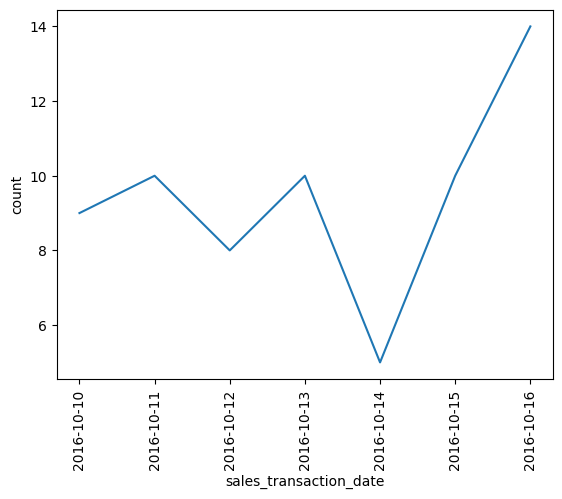

In [19]:
#Plooting linegraph which shows how many sales are done on that specific date

sns.lineplot(data=value_count_df2, x = 'sales_transaction_date', y='count' )
plt.xticks(rotation=90)
plt.show()

In [20]:
# Calculating total sales for sprint scotter for transaction date between 10-10-16 to 16-10-16:

total_sales_count_for_product_7= (new_df2['product_id']==7).sum()

total_sales_count_for_product_7


66

Answer 1 : The cummulative sales volume ( in units) for the first 7 days between 10-10-2016 and 16-10-2016 is 66

--> In short, total 66 units/products were sold in first 7 days (from 10-10-16 to 16-10-16)

# Question 2: On 20th Oct, What are the last 7 days' Cumulative sales of Sprint Scooter ( in units)

In [21]:
#Filtering data between 13-10-16 to 19-10-16:

# Assigning Starting_date to a variable:
start_date = pd.to_datetime('13-10-16')

# Assigning end_date to a variable:
end_date = pd.to_datetime('19-10-16')

# Creating new dataframe for sales_transaction_date beween 13-10-16 to 19-10-16:
df3 = df[(df['sales_transaction_date'] >= start_date) & (df['sales_transaction_date'] <= end_date)]


In [22]:
# Sorting dataframe:
df3_sorted = df3.sort_values('sales_transaction_date')

In [23]:
# Getting only necessary columns from the df3 dataframe & storing it in new dataframe:
new_df3 = df3_sorted[['product_id','sales_transaction_date']]


In [24]:
# Counting sales_transaction_date values of product id 7(Sprint Scotter):

value_count_df3 = new_df3[new_df3['product_id']==7].value_counts().reset_index(name='count')

value_count_df3

,product_id,sales_transaction_date,count
0,7,2016-10-16,14
1,7,2016-10-19,12
2,7,2016-10-18,11
3,7,2016-10-13,10
4,7,2016-10-15,10
5,7,2016-10-17,9
6,7,2016-10-14,5


<function matplotlib.pyplot.show(close=None, block=None)>

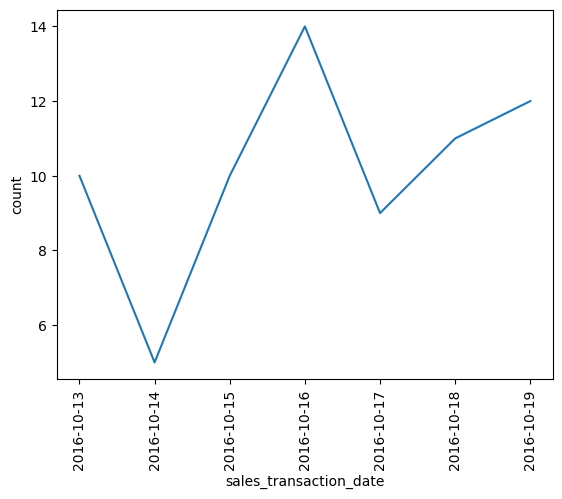

In [25]:
#Plooting linegraph which shows how many sales are done from date between 13-10-16 to 19-10-16

sns.lineplot(data=value_count_df3 , x='sales_transaction_date', y = 'count' )
plt.xticks(rotation=90)
plt.show

In [26]:
# Calculating total sales for sprint scotter for transaction date between 13-10-16 to 19-10-16:

total_sales_count_for_product_7_df3 = (new_df3['product_id']==7).sum()

total_sales_count_for_product_7_df3

71

Answer 2 : On 20th Oct the last 7 days' Cumulative sales of Sprint Scooter ( in units) is 71

--> In short total 71 units/products were sold in last 7 days(from 13-10-16 to 19-10-16)

# Question 3 : On which date did the sales volume reach its highest point?

In [27]:
#Filtering data between 13-10-16 to 19-10-16:

# Assigning Starting_date to a variable:
start_date_3 = pd.to_datetime('10-10-16')

# Assigning end_date to a variable:
end_date_3 = pd.to_datetime('30-10-16')

# Creating new dataframe for sales_transaction_date beween 13-10-16 to 19-10-16:
df4 = df[(df['sales_transaction_date'] >= start_date_3) & (df['sales_transaction_date'] <= end_date_3)]

#Printing newly created dataframe:
df4

,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
13,1039.0,7,2016-10-19,dealership,1.0,NaN,NaN,NaN,NaN,NaN,NaN
113,17325.0,7,2016-10-24,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,30649.0,7,2016-10-27,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,37626.0,7,2016-10-19,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,8067.0,7,2016-10-18,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
37008,33369.0,6,2016-10-14,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37181,5793.0,6,2016-10-14,dealership,10.0,NaN,NaN,NaN,NaN,NaN,NaN
37339,28706.0,6,2016-10-18,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37478,47216.0,6,2016-10-10,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Taking only required columns from the dataframe and storing it in the new variable:

new_df4 = df4[['product_id','sales_transaction_date']]
new_df4

,product_id,sales_transaction_date
13,7,2016-10-19
113,7,2016-10-24
209,7,2016-10-27
264,7,2016-10-19
425,7,2016-10-18
...,...,...
37008,6,2016-10-14
37181,6,2016-10-14
37339,6,2016-10-18
37478,6,2016-10-10


In [29]:
# Finding total count of units sold of the specific product on that specific sales transaction date:

value_count_df4 = new_df4[new_df4['product_id']==7].value_counts().reset_index(name='count')
value_count_df4

,product_id,sales_transaction_date,count
0,7,2016-10-16,14
1,7,2016-10-19,12
2,7,2016-10-18,11
3,7,2016-10-20,10
4,7,2016-10-13,10
5,7,2016-10-11,10
6,7,2016-10-15,10
7,7,2016-10-25,9
8,7,2016-10-10,9
9,7,2016-10-17,9


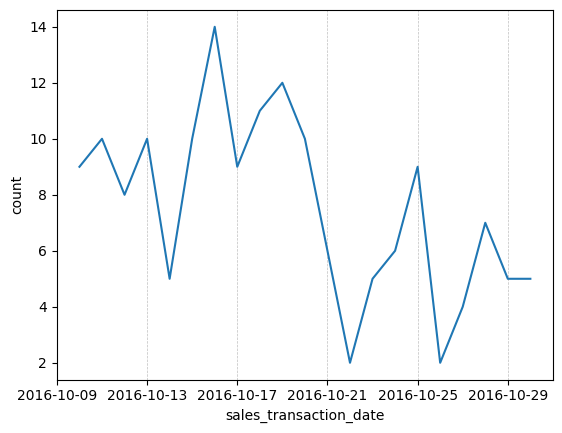

In [30]:
# Ploting linegraph, which shoes total sales volume according to sales data:

#This kind of plot help us to find the reqiured answer without making it difficult by looking into the data.

sns.lineplot(data=value_count_df4, x='sales_transaction_date', y='count', markers=True)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

Answer 3: The sales volume reach its highest point was on 16-10-2016

# Question 4 :On 22 -10-2016 by what percentage cummulative sales of last 7 days dropped compared to last 7 days cummulative sales on 21-10-2016 ?

In [31]:
# cummulative sales on 21-10-2016. (date range between 15 to 21)

start_date_1 = pd.to_datetime('2016-10-15')
end_date_1 = pd.to_datetime('2016-10-21')

# Creating new dataframe for sales_transaction_date beween 2016-10-15 to 2016-10-21:

df5 = df[(df['sales_transaction_date'] >= start_date_1) & (df['sales_transaction_date'] <= end_date_1)]
df5

,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
13,1039.0,7,2016-10-19,dealership,1.0,NaN,NaN,NaN,NaN,NaN,NaN
264,37626.0,7,2016-10-19,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,8067.0,7,2016-10-18,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,21477.0,7,2016-10-17,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,27413.0,7,2016-10-18,dealership,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31113,5153.0,3,2016-10-17,dealership,3.0,NaN,NaN,NaN,NaN,NaN,NaN
31724,18247.0,3,2016-10-16,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36690,20077.0,6,2016-10-19,dealership,7.0,NaN,NaN,NaN,NaN,NaN,NaN
36764,29248.0,6,2016-10-15,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Finding cumulative sales: cumulative sales =  the sum of the “Total sales” reported by the Company for each fiscal year.

cumulative_sales1 = (df5['product_id']==7).sum()

In [33]:
# cummulative sales on 22-10-2016.(date range from 16 to 22)

start_date_2 = pd.to_datetime('2016-10-16')
end_date_2 = pd.to_datetime('2016-10-22')

# Creating new dataframe for sales_transaction_date beween 2016-10-16 to 2016-10-22:

df6 = df[(df['sales_transaction_date'] >= start_date_2) & (df['sales_transaction_date'] <= end_date_2)]

#printing the dataframe:
df6

,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
13,1039.0,7,2016-10-19,dealership,1.0,NaN,NaN,NaN,NaN,NaN,NaN
264,37626.0,7,2016-10-19,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,8067.0,7,2016-10-18,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,21477.0,7,2016-10-17,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,27413.0,7,2016-10-18,dealership,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31113,5153.0,3,2016-10-17,dealership,3.0,NaN,NaN,NaN,NaN,NaN,NaN
31724,18247.0,3,2016-10-16,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36690,20077.0,6,2016-10-19,dealership,7.0,NaN,NaN,NaN,NaN,NaN,NaN
36729,9767.0,6,2016-10-22,dealership,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df6 = df6[['product_id', 'sales_transaction_date']]

In [35]:
value_count__ = df6[df6['product_id']==7].value_counts().reset_index(name='count')
value_count__

,product_id,sales_transaction_date,count
0,7,2016-10-16,14
1,7,2016-10-19,12
2,7,2016-10-18,11
3,7,2016-10-20,10
4,7,2016-10-17,9
5,7,2016-10-21,6
6,7,2016-10-22,2


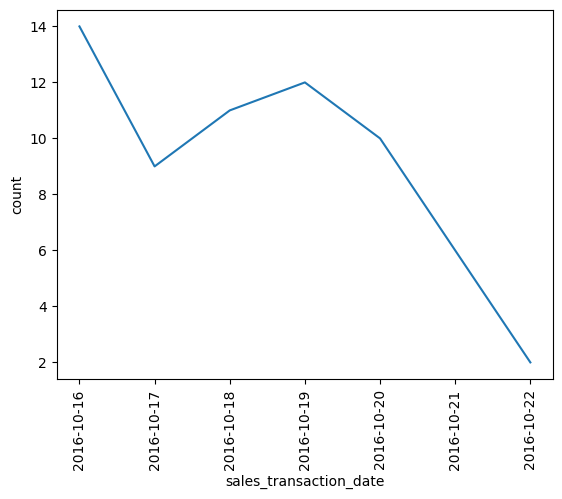

In [36]:
#Plotting line graph:
drop_Line_plot_second_half_of_year = sns.lineplot(data = value_count__ , x='sales_transaction_date', y = 'count')
drop_Line_plot_second_half_of_year
plt.xticks(rotation=90)
plt.show()

In [37]:
#Finding cumulative sales:

cumulative_sales2 = (df6['product_id']==7).sum()

In [38]:
#Applying formula:

percentage_drop = ((cumulative_sales2 - cumulative_sales1) / cumulative_sales1) * 100
print("The pecentage drop is of:", percentage_drop.round())

The pecentage drop is of: -11.0


--> Answer: On 22 -10-2016 There was **11%** of drop in cummulative sales of last 7 days compared last 7 days cummulative sales on 21-10-2016

# Question 5 : The growth rate of the Sprint Limited Edition launched on a different production start date.

In [39]:
#checking the model name of the scotter:

df_product['model'][df_product['product_id']==8]

7    Sprint Limited Edition
Name: model, dtype: object

In [40]:
# Getting start date of production of the scotter(sprint limited edition):

df_product['production_start_date'][df_product['product_id']==8]

7    15-02-2017 00:00
Name: production_start_date, dtype: object

What is the cummulative sales volume ( in units) for the first 7 days between 15-02-2017  and 21-02-2017

In [41]:
# Changing column datatype to date time:

df['sales_transaction_date'] = pd.to_datetime(df['sales_transaction_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37723 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             37711 non-null  float64       
 1   product_id              37723 non-null  int64         
 2   sales_transaction_date  37711 non-null  datetime64[ns]
 3   channel                 37711 non-null  object        
 4   dealership_id           16648 non-null  float64       
 5   model                   12 non-null     object        
 6   year                    12 non-null     float64       
 7   product_type            12 non-null     object        
 8   base_price              12 non-null     float64       
 9   production_start_date   12 non-null     object        
 10  production_end_date     6 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [42]:
# Selecting date range between (date range between 15 to 21):

start_date_2_1 = pd.to_datetime('15-02-17')
end_date_2_1 = pd.to_datetime('21-02-17')

# Creating new dataframe for sales_transaction_date beween 2016-10-15 to 2016-10-21:

dff = df[(df['sales_transaction_date'] >= start_date_2_1) & (df['sales_transaction_date'] <= end_date_2_1)]

#printing dataframe:

dff

,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
420,7462.0,7,2017-02-20,dealership,7.0,NaN,NaN,NaN,NaN,NaN,NaN
448,10290.0,7,2017-02-20,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,17210.0,7,2017-02-21,dealership,12.0,NaN,NaN,NaN,NaN,NaN,NaN
522,17740.0,7,2017-02-17,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,18898.0,7,2017-02-18,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36082,41828.0,10,2017-02-19,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36157,15926.0,10,2017-02-17,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36573,16366.0,10,2017-02-21,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37016,39163.0,6,2017-02-21,dealership,12.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Selecting only necessary columns from 'dff' dataframe and storing it in new variable:

new_dff = dff[['sales_transaction_date', 'product_id']]

In [44]:
#Counting how many products sold on the specific date:

value_count_dff2 = new_dff[new_dff['product_id']==8].value_counts().reset_index(name='count')

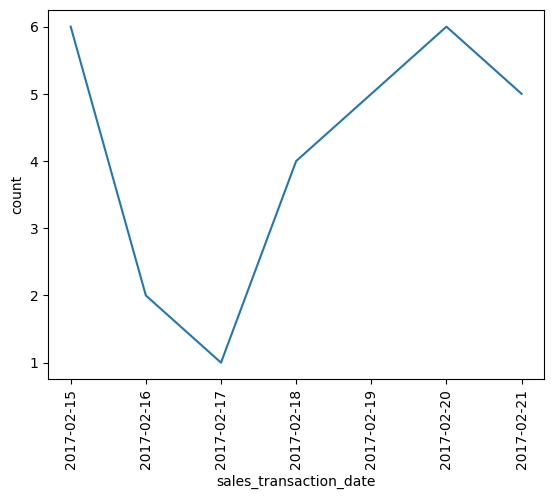

In [45]:
#Plotting linegraph which shows how many products sold on that date :

sns.lineplot(data = value_count_dff2 , x = 'sales_transaction_date', y ='count')
plt.xticks(rotation=90)
plt.show()

In [46]:
#Finding cumulative sales for product id 8 on the specific date range:

cumulative_sales_2_1 = (new_dff['product_id']==8).sum()
cumulative_sales_2_1

29

In [47]:
#Taking date range on which we want to work on:

start_date_2_2 = pd.to_datetime('16-02-17')
end_date_2_2 = pd.to_datetime('22-02-17')

# Creating new dataframe for sales_transaction_date beween 2017-10-16 to 2017-10-22:

dff2 = dff[(dff['sales_transaction_date']>=start_date_2_2 ) & (dff['sales_transaction_date']<=end_date_2_2)]

#Printing the newly created dataframe:

dff2

,customer_id,product_id,sales_transaction_date,channel,dealership_id,model,year,product_type,base_price,production_start_date,production_end_date
420,7462.0,7,2017-02-20,dealership,7.0,NaN,NaN,NaN,NaN,NaN,NaN
448,10290.0,7,2017-02-20,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,17210.0,7,2017-02-21,dealership,12.0,NaN,NaN,NaN,NaN,NaN,NaN
522,17740.0,7,2017-02-17,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,18898.0,7,2017-02-18,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36082,41828.0,10,2017-02-19,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36157,15926.0,10,2017-02-17,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36573,16366.0,10,2017-02-21,internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37016,39163.0,6,2017-02-21,dealership,12.0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Selecting only necessary columns from 'dff2' dataframe and storing it in new variable:

new_dff2 = dff2[['sales_transaction_date','product_id']]

In [49]:
#Counting how many products sold on the specific date:

value_count = new_dff2[new_dff2['product_id']==8].value_counts().reset_index(name='count')
value_count

,sales_transaction_date,product_id,count
0,2017-02-20,8,6
1,2017-02-19,8,5
2,2017-02-21,8,5
3,2017-02-18,8,4
4,2017-02-16,8,2
5,2017-02-17,8,1


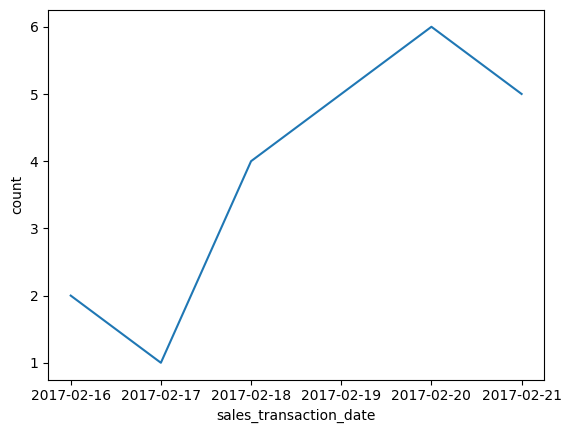

In [50]:
#Plotting linegraph which shows how many products sold on that date :

Line_plot_first_half_of_year = sns.lineplot(data=value_count , x= 'sales_transaction_date', y ='count')

In [51]:
#Finding cumulative sales for product id 8 on the specific date range:

cumulative_sales2_2 = (new_dff2['product_id']==8).sum()

In [52]:
#Applying formula for finding percentage growth:

percentage_growth = ((cumulative_sales_2_1 - cumulative_sales2_2) / cumulative_sales_2_1) * 100

#Printing output:

print("The percentage growth is:",percentage_growth)

The percentage growth is: 20.689655172413794


--> Answer: There was 20.6% growth in the growth rate of the Sprint Limited Edition launched on a different production start date

#Observations:
1. The cumulative sales for first 7 days 10-10-2016 and 16-10-2016 is 66 units.
2. The cumulative sales for last 7 days' Cumulative sales of Sprint Scooter is 71 units.
3. It is seen that the product launched in second half of the year tends to sales drop and perform poorly and make less sale.
4. The products launched in first half of the year tends to sales growth and perform wll and make more sale.
5. On 16-10-2016 the sale was highest for the product.

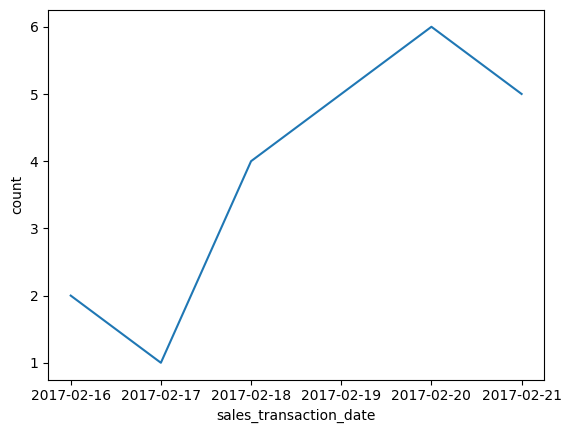

In [53]:
#Sales plot for first falf of the year:

Line_plot_first_half_of_year = sns.lineplot(data=value_count , x= 'sales_transaction_date', y ='count')

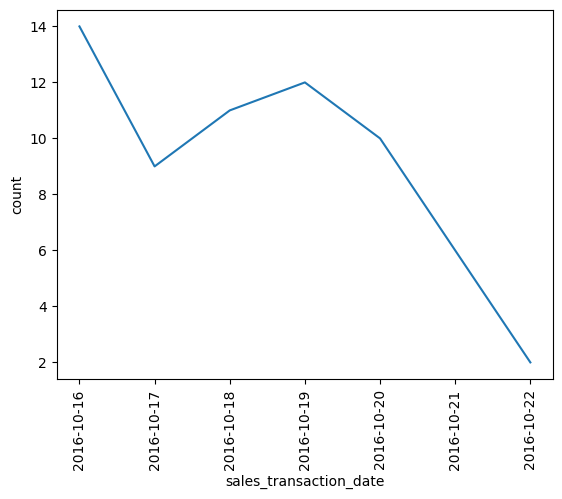

In [54]:
# Sales plot for second half of the year.
drop_Line_plot_second_half_of_year = sns.lineplot(data = value_count__ , x='sales_transaction_date', y = 'count')
plt.xticks(rotation=90)
plt.show()

#Conclusion:
--> This concludes to the reason for drop of sprint scooter i.e launch date affected the sales of sprint scooter (second half of the year).

--> Whereas the limited edition sprint scooter which was launched on first half of the year made a good sale.

--> Taking all the observations into consideration it is best for the company to launch the scooter in first half of the year.